# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# IMPORTING CSV FILE

In [3]:
company = pd.read_csv(r"C:\Users\Admin\Desktop\Quantum Learning Project\Company Attrition Data.csv")

# EDA

In [4]:
company.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
company.shape

(14999, 10)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
company.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.613,0.249,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716,0.171,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803,1.233,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050,49.943,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498,1.460,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.145,0.352,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238,0.426,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021,0.144,0.00,0.00,0.00,0.00,1.0


In [8]:
# From below it's confirmed that there is no null/nan data in the company dataset.
company.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [9]:
# Removing duplicates from dataset.
print(company.duplicated().sum())
company.drop_duplicates(inplace = True)
print(company.duplicated().sum())

3008
0


# DATA VISUALIZATION

0    10000
1     1991
Name: left, dtype: int64


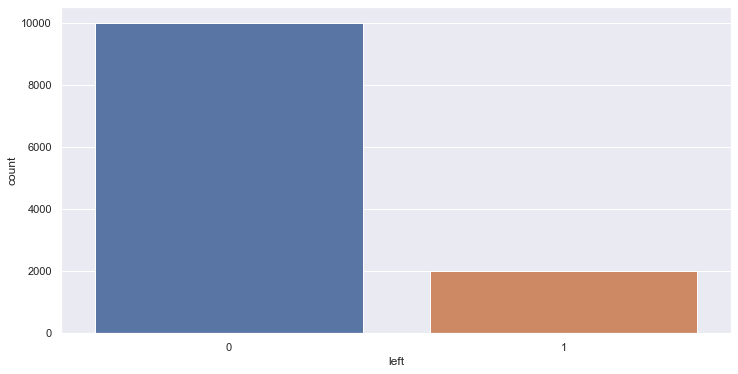

In [10]:
print(company["left"].value_counts())
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="left", data=company)

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Sales_Occured, dtype: int64


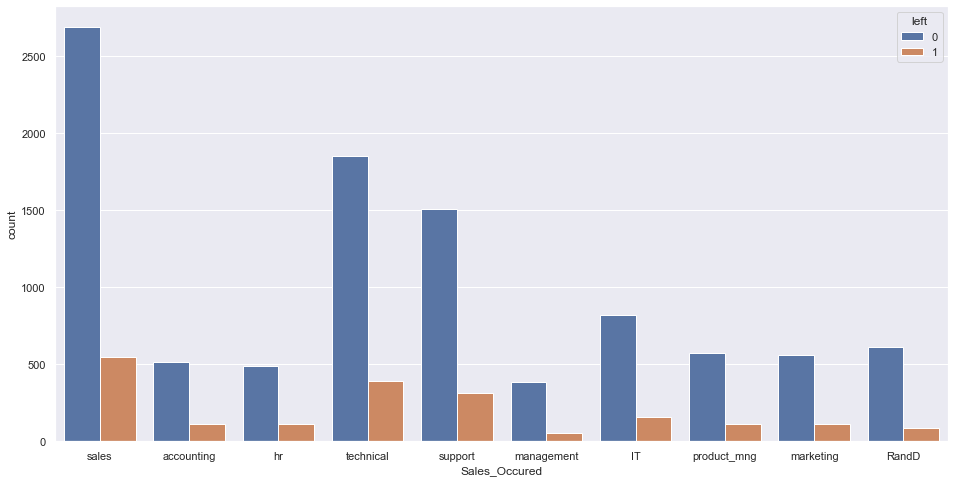

In [11]:
print(company["Sales_Occured"].value_counts())
plt.figure(figsize=(16,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sales_Occured",hue="left", data=company)

low       5740
medium    5261
high       990
Name: salary, dtype: int64


Text(0.5, 1.0, 'Salary')

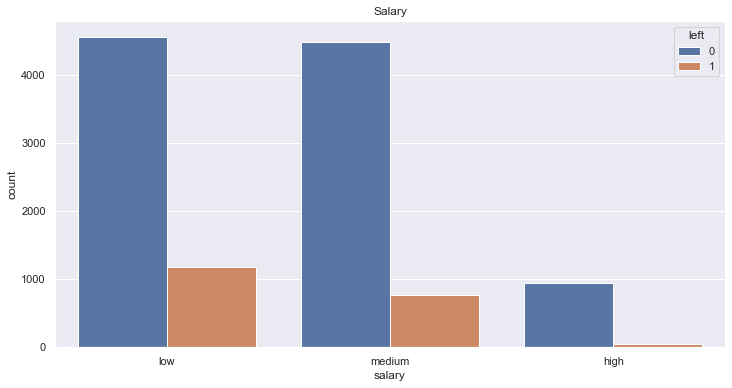

In [12]:
print(company["salary"].value_counts())
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="salary",hue="left", data=company)
plt.title("Salary")

0    10141
1     1850
Name: Work_accident, dtype: int64


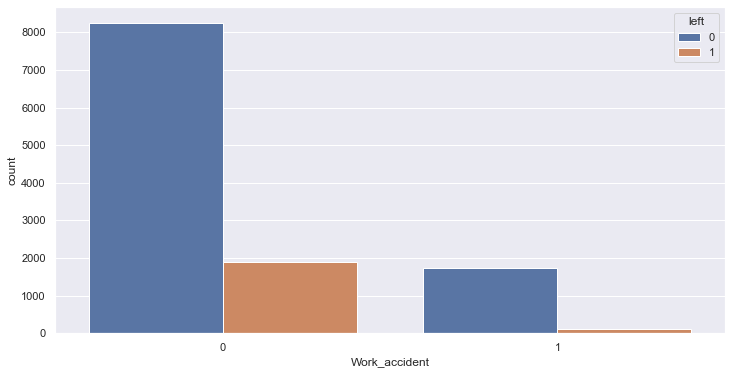

In [13]:
print(company["Work_accident"].value_counts())
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Work_accident",hue="left", data=company)

0    11788
1      203
Name: promotion_last_5years, dtype: int64


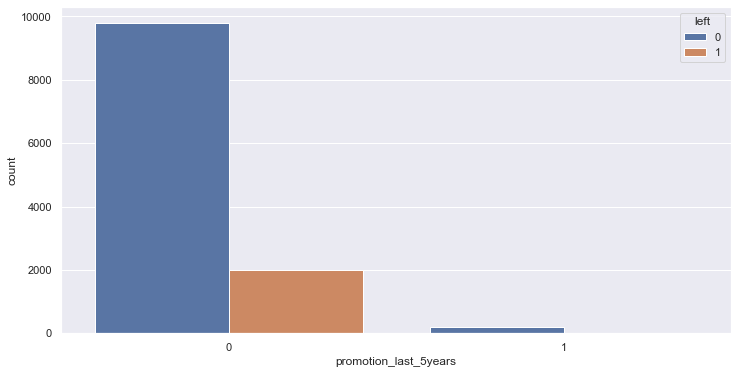

In [14]:
print(company["promotion_last_5years"].value_counts())
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="promotion_last_5years",hue="left", data=company)

In [15]:
# Before removing outlier from the dataset.
skewdata = company.skew(axis=0,skipna=True)
skewdata.sort_values(axis=0,ascending=True)

satisfaction_level      -0.538702
last_evaluation         -0.031686
average_montly_hours     0.027208
number_project           0.332152
left                     1.795135
time_spend_company       1.816577
Work_accident            1.914410
promotion_last_5years    7.490008
dtype: float64

In [16]:
data = company.copy()

# One Hot Encoding

In [17]:
#Using One Hot Encoding for PaymentMethod and contract
dummies = pd.get_dummies(data[["Sales_Occured","salary"]])
dummies.head()

,Sales_Occured_IT,Sales_Occured_RandD,Sales_Occured_accounting,Sales_Occured_hr,Sales_Occured_management,Sales_Occured_marketing,Sales_Occured_product_mng,Sales_Occured_sales,Sales_Occured_support,Sales_Occured_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [18]:
#Concatinating both the dataframes together
data = pd.concat([data,dummies],axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary,...,Sales_Occured_hr,Sales_Occured_management,Sales_Occured_marketing,Sales_Occured_product_mng,Sales_Occured_sales,Sales_Occured_support,Sales_Occured_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [19]:
# After one hot encoding remove the previous column for whose new columns are created.
data.drop(["Sales_Occured","salary"],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level         11991 non-null  float64
 1   last_evaluation            11991 non-null  float64
 2   number_project             11991 non-null  int64  
 3   average_montly_hours       11991 non-null  int64  
 4   time_spend_company         11991 non-null  int64  
 5   Work_accident              11991 non-null  int64  
 6   left                       11991 non-null  int64  
 7   promotion_last_5years      11991 non-null  int64  
 8   Sales_Occured_IT           11991 non-null  uint8  
 9   Sales_Occured_RandD        11991 non-null  uint8  
 10  Sales_Occured_accounting   11991 non-null  uint8  
 11  Sales_Occured_hr           11991 non-null  uint8  
 12  Sales_Occured_management   11991 non-null  uint8  
 13  Sales_Occured_marketing    11991 non-null  uin

In [21]:
data.shape

(11991, 21)

In [22]:
# Removing promotion_last_5years as it is highly skewed.
data.drop(["promotion_last_5years"],axis=1,inplace=True)

# MODEL BUILDING AND TESTING

In [23]:
y = data["left"]
X = data.drop(["left"],axis=1)

In [24]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
y_test.value_counts()

0    2971
1     627
Name: left, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  


rfc = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rfc.fit(X_train, y_train)
print("Train accuracy=",rfc.score(X_train, y_train))

# Make predictions
rfc_pred = rfc.predict(X_test)
print ("Test accuracy=",accuracy_score(y_test, rfc_pred))

Train accuracy= 0.9792684379840343
Test accuracy= 0.981100611450806


In [27]:
# Create the Confusion matrix
print(confusion_matrix(y_test,rfc_pred))  

[[2962    9]
 [  59  568]]


In [28]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

print("Train accuracy=",ada.score(X_train, y_train))
ada_pred = ada.predict(X_test)
print ("Test accuracy=",accuracy_score(y_test, ada_pred))

Train accuracy= 0.9642559275586798
Test accuracy= 0.9635908838243469


In [29]:
# Create the Confusion matrix
print(confusion_matrix(y_test,ada_pred))  

[[2914   57]
 [  74  553]]


In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Train accuracy=",xgb.score(X_train, y_train))
xgb_pred = xgb.predict(X_test)
print ("Test accuracy=",accuracy_score(y_test, xgb_pred))

[10:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy= 0.9967830334802812
Test accuracy= 0.9838799332962757


In [31]:
# Create the Confusion matrix
print(confusion_matrix(y_test,xgb_pred))  

[[2959   12]
 [  46  581]]
